# Life Expectancy and GDP

## Introduction

This project will look at the life expectancy and GDP of six nations over time to investigate if there is a strong correlation. 

The questions that this project aims to look at:
- Has life expectancy in these countries increased over time?
- Has the GDP of these countries increased over time?
- Is there a correlation between GDP and life expectancy in these countries?
- What is the average life expectancy for each country?
- Is the average life expectancy distribution normal or skewed?


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Libraries

In [73]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

## Load Data into Dataframe

The data is loaded into "all_data" from the CSV file. We look at the first five rows of the dataframe using the .head() method. We then observe the information about the four columns in the dataframe using the .describe() method.

In [9]:
# Inspect the dataset
all_data = pd.read_csv('all_data.csv')
print(all_data.head())
all_data.describe(include='all')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


We can see from the .describe() method that our dataframe contains 96 rows and 4 columns. There are 6 unique countries within this dataset. We will investigate which specific countries in the next section.

From the Year column, we see that our data extends from 2000 to 2015. We will investigate these two variables further in the next section. 

From the Life expectancy at birth (years) column, we see that the mean life expectancy across the entire dataframe is 72.79 (rounded to 2 decimal places). This will be helpful for charting and comparison to the average life expectancy for each country individually.

#### Rename Column

Before we dive too far into the dataframe, the column names, particularly the 'Life expectancy at birth (years), are somewhat difficult to access. Let's rename it!

In [14]:
all_data = all_data.rename({'Life expectancy at birth (years)': 'LEABY'}, axis='columns')
print(all_data.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


## Explore the Data

First, we will look at what countries we are analyzing.

In [10]:
print(all_data['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The six countries in our dataframe are:
- Chile
- China
- Germany
- Mexico
- United States of America
- Zimbabwe

Now let's run the unique values of the "Year" column to check that all years between 2000 and 2015 are represented before we plot a chart. 

In [13]:
print(all_data['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Exploratory Plots

Let's visualize the data all together before we break down analysis by country.

First, take a look at the histogram of the `GDP` data below. There is a clear skew to the right where most of the values are on the left side.

<Figure size 800x400 with 0 Axes>

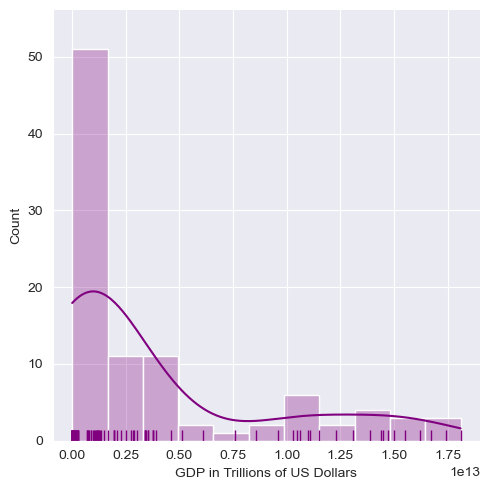

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=[8, 4])
sns.set_style('darkgrid')
sns.displot(all_data['GDP'], kde=True, rug=True, color = 'purple', alpha=0.3
            )
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()
plt.clf()

Now, we will take a look at the histogram for the `LEABY` data column. The data appears to be very left-skewed with most of the data on the right side.

<Figure size 800x400 with 0 Axes>

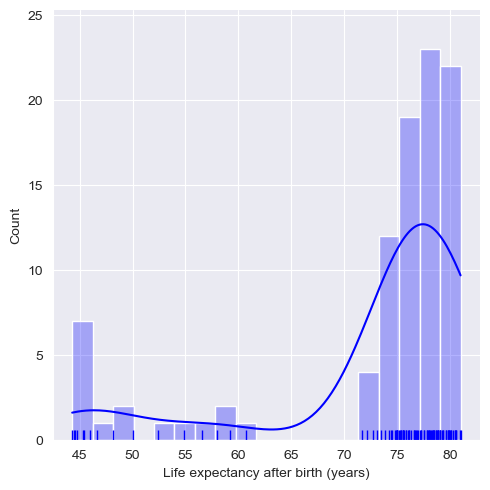

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=[8, 4])
sns.displot(all_data['LEABY'], kde=True, rug=True, color = 'blue', alpha=0.3
            )
plt.xlabel('Life expectancy after birth (years)')
plt.show()
plt.clf()

#### Finding the Average

Now that we have seen the distributions of `GDP` and `LEABY` over the entire dataset, let's find the average for each country.

 We will need to save the means to a new dataframe by reshaping our `all_data` dataframe.

In [25]:
means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now we can plot the averages of each country onto a bar chart for LEABY and GDP respectively.

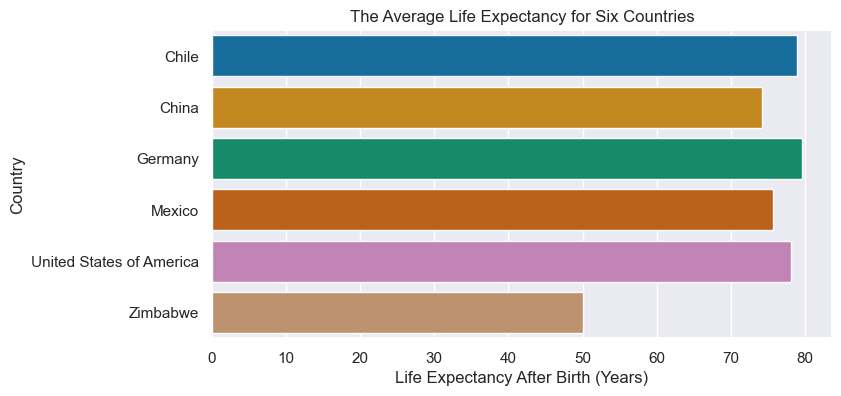

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize=[8,4])
sns.barplot(data=means, x='LEABY', y='Country', palette='colorblind')
plt.xlabel('Life Expectancy After Birth (Years)')
plt.title('The Average Life Expectancy for Six Countries')
plt.show()
plt.clf()

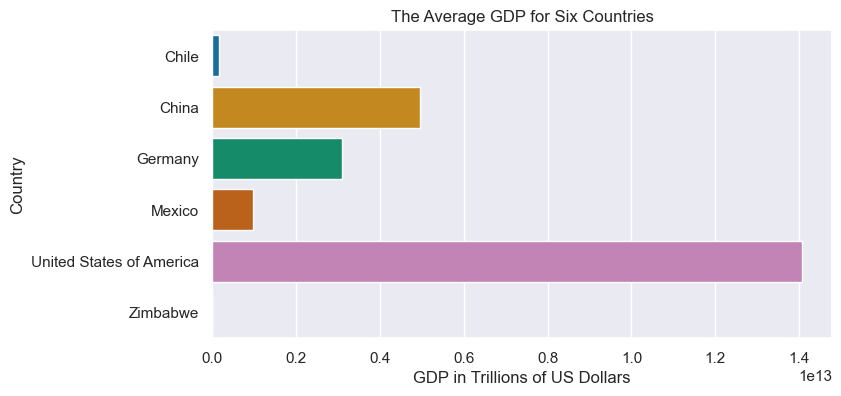

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=[8, 4])
sns.barplot(data=means, x='GDP', y='Country', palette='colorblind')
plt.xlabel('GDP in Trillions of US Dollars')
plt.title('The Average GDP for Six Countries')

plt.show()
plt.clf()

#### Visualizing GDP Over Time

Let's use a line chart to visualize the change in GDP over time for the six countries in our dataset.

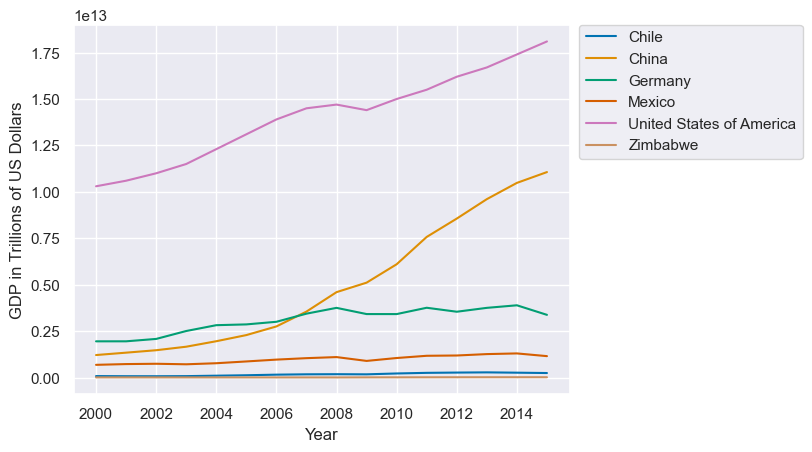

<Figure size 640x480 with 0 Axes>

In [80]:
sns.lineplot(data=all_data, 
             x=all_data['Year'], 
             y=all_data['GDP'], 
             hue=all_data['Country'], 
             palette='colorblind')
plt.ylabel('GDP in Trillions of US Dollars')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

From the line chart, it appears that China's GDP has been on the rise since 2008. The United States has a significantly higher GDP than the other five countries, as well as increasing its GDP over time. We can see additionally that the other 4 countries' GDP has stayed steady over the Year axis towards the lower end of GDP in trillions of US Dollars.

Let's visualize each country separately for increase in GDP over time, as the United States is an outlier among this data.

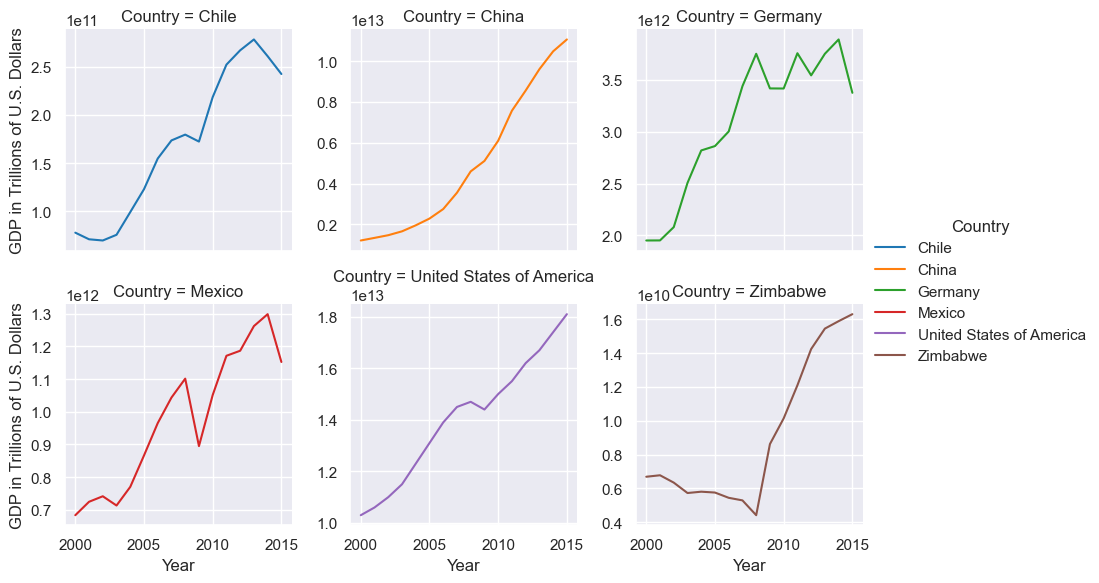

In [82]:
graphGDP = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

#### Visualizing LEABY Over Time

Let's do the same thing we did above with GDP, but with Life Expectancy After Birth (Years).

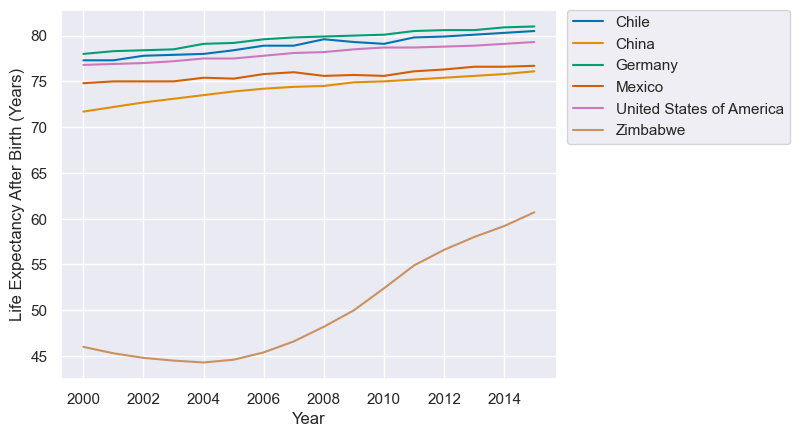

<Figure size 640x480 with 0 Axes>

In [81]:
sns.lineplot(data=all_data, 
             x=all_data['Year'], 
             y=all_data['LEABY'], 
             hue=all_data['Country'], 
             palette='colorblind')
plt.ylabel('Life Expectancy After Birth (Years)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

From the above chart, we see some interesting ways that life expectancy has changed over time. Five of the countries are in the 70-80 year range with a small increase over time. The chart reveals that Zimbabwe increased its life expectancy significantly from 45 to 60 in a decade (approx. 2004-2014). 

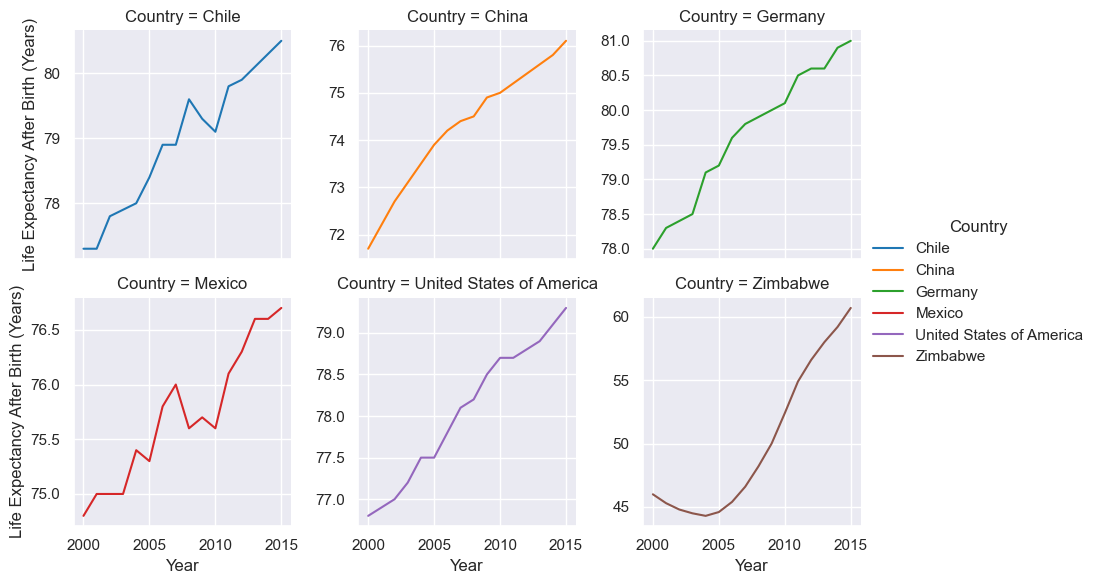

In [84]:
graphLEABY = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy After Birth (Years)"))

graphLEABY;

#### Correlation Between GDP and Life Expectancy


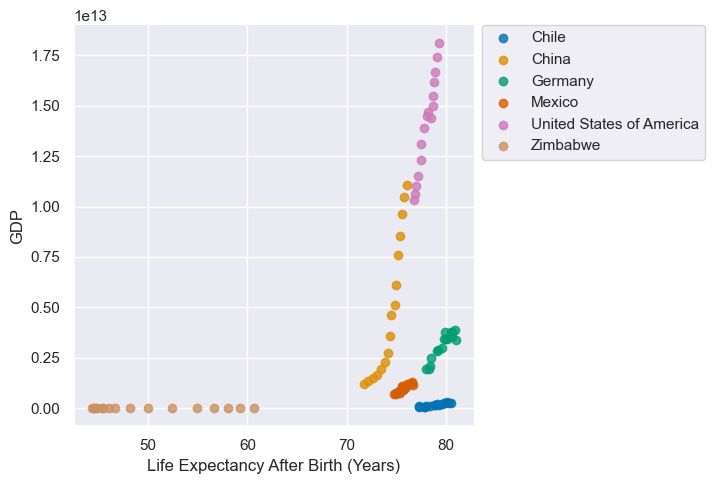

<Figure size 640x480 with 0 Axes>

In [86]:
sns.lmplot( x="LEABY",
           y="GDP", 
           data=all_data, 
           fit_reg=False, 
           hue='Country', 
           legend=False, 
           palette="colorblind")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Life Expectancy After Birth (Years)')
plt.show()
plt.clf()

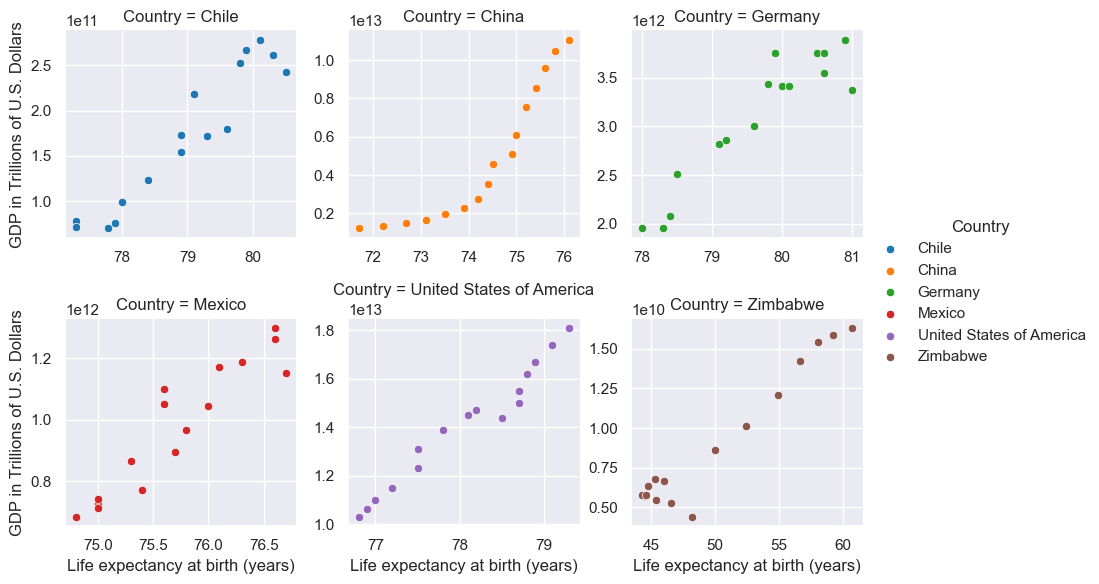

In [88]:
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


We can see from the charts above that there is a positive correlation between LEABY and GDP in our dataset.

## Conclusion



Let's return to the original questions:

- Has life expectancy in these countries increased over time?
    - Yes, all countries saw an increase in life expectancy over time. 
- Has the GDP of these countries increased over time?
    - Yes, all countries saw an increase in GDP over time.
- Is there a correlation between GDP and life expectancy in these countries?
    - Yes, there is a positive correlation between GDP and life expectancy in our data on these six countries.
- What is the average life expectancy for each country?
    - The average life expectancy is 70s for all of the countries except Zimbabwe, which averages to 50s.
- Is the average life expectancy distribution normal or skewed?
    - The life expectancy skews left.

## Further Research

- Why did China's GDP increase so significantly in 2008?
- Why did Zimbabwe's life expectancy jump so dramatically? 
    - Is there another contributing factor?